#### Visualization of features
- Features used for DQN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from pathlib import Path

In [24]:
PATH = "/scratch/hpc-prf-intexml/tklenke/experiment_runs/dacboenv_best_obs"
PATH = "/scratch/hpc-prf-intexml/tklenke/repos/dacboenv/runs/DACBOEnv-SMAC3-AFknick/"

In [33]:
# Read logs and create df

dacboenv_jsons = list(Path(PATH).rglob("DACBOEnvLogs.jsonl"))
json_dfs = []

for j in dacboenv_jsons:

    tmp = pd.read_json(j, lines=True)
    tmp["source"] = j

    json_dfs.append(tmp)
    
for j in list(Path("/scratch/hpc-prf-intexml/tklenke/repos/dacboenv/runs/DACBOEnv-SMAC3-AFknick1/").rglob("DACBOEnvLogs.jsonl")):

    tmp = pd.read_json(j, lines=True)
    tmp["source"] = j

    json_dfs.append(tmp)

dacboenv_df = pd.concat(json_dfs, ignore_index=True)
dacboenv_df.to_csv(f"{PATH}/dacboenv_json.csv")

In [34]:
# Extract metadata from path

dacboenv_df["optimizer"] = dacboenv_df["source"].apply(lambda x: x.parts[7])
dacboenv_df["seed"] = dacboenv_df["source"].apply(lambda x: x.parts[-2])
dacboenv_df["task"] = dacboenv_df["source"].apply(lambda x: f"bbob/2/{x.parts[-4]}")

dacboenv_df.to_csv(f"{PATH}/dacboenv_json.csv")

In [35]:
dacboenv_df = pd.read_csv(f"{PATH}/dacboenv_json.csv")

In [36]:
# Extract observations
dacboenv_df["observation"] = dacboenv_df["observation"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
observations = pd.json_normalize(dacboenv_df["observation"])

observations["optimizer"] = dacboenv_df["optimizer"]
observations["seed"] = dacboenv_df["seed"]
observations["task"] = dacboenv_df["task"]

observations.to_csv(f"{PATH}/dacboenv_observations.csv")

In [37]:
# Extract rewards
dacboenv_df["full_reward"] = dacboenv_df["full_reward"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
rewards = pd.json_normalize(dacboenv_df["full_reward"])

rewards["optimizer"] = dacboenv_df["optimizer"]
rewards["seed"] = dacboenv_df["seed"]
rewards["task"] = dacboenv_df["task"]
rewards["reward"] = dacboenv_df["reward"]
rewards["n_trials"] = dacboenv_df["n_trials"]

rewards.to_csv(f"{PATH}/dacboenv_rewards.csv")

In [8]:
observations

,incumbent_changes,trials_passed,trials_left,ubr,tsp,knn_entropy,y_skewness,y_kurtosis,y_mean,y_std,...,y_mean_best,y_std_best,y_variability_best,gp_hp_k1__k1__constant_value0_observation,gp_hp_k1__k2__length_scale0_observation,gp_hp_k1__k2__length_scale1_observation,gp_hp_k2__noise_level0_observation,optimizer,seed,task
0,[1.0],[1.0],[76.0],[1.156258225440979],[0.0],[0.0],[0.0],[0.0],[274573.65625],[0.0],...,[274573.65625],[0.0],[-1.0],[-1.5],[-2.017926454544067],[-6.467671394348144],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
1,[2.0],[2.0],[75.0],[214091.390625],[1.679311990737915],[0.0],[-2.9836867915930743e-16],[-2.0],[138605.875],[135967.78125],...,[2638.087158203125],[0.0],[-1.0],[-0.44285440444946206],[-3.296248435974121],[-1.345802545547485],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
2,[3.0],[3.0],[74.0],[226488.453125],[1.750581860542297],[0.0],[0.7068740129470821],[-1.5],[92383.6015625],[128832.53125],...,[-60.939456939697266],[0.0],[-1.0],[-0.402928948402404],[-1.356743097305297],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
3,[3.0],[4.0],[73.0],[264112.25],[2.004799842834472],[0.754671692848205],[1.088838338851928],[-0.7236913442611691],[79401.4921875],[113815.515625],...,[-60.939456939697266],[0.0],[-1302.95703125],[-0.31037512421607905],[-1.605574369430542],[-1.124774098396301],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
4,[3.0],[5.0],[72.0],[247887.171875],[2.074475288391113],[0.322119414806365],[1.405733466148376],[0.12483070045709602],[70577.8671875],[103317.96875],...,[-60.939456939697266],[0.0],[-321.28485107421875],[-0.21927328407764402],[-1.861562609672546],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,[15.0],[73.0],[4.0],[11132.7216796875],[6.1254563331604],[-2.947818756103515],[4.762538909912109],[22.69690704345703],[16855.408203125],[68110.1171875],...,[-135.12400817871094],[0.00018693400488700002],[0.99999862909317],[1.13293445110321],[-0.5632216334342951],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
73,[16.0],[74.0],[3.0],[11266.404296875],[6.12549877166748],[-3.042804479598999],[4.7989702224731445],[23.07027244567871],[16625.806640625],[67676.7890625],...,[-135.12413024902344],[0.00024197121092500002],[0.9999979734420771],[1.143797397613525],[-0.563290774822235],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
74,[16.0],[75.0],[2.0],[11330.29296875],[6.125499725341797],[-3.178829669952392],[4.8351287841796875],[23.44366455078125],[16402.326171875],[67251.578125],...,[-135.1241912841797],[0.000181039053131],[0.9999983906745911],[1.155786395072937],[-0.5634998679161071],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8
75,[16.0],[76.0],[1.0],[11230.7578125],[6.125527381896973],[-3.3389217853546143],[4.871021270751953],[23.81707763671875],[16184.728515625],[66834.2421875],...,[-135.12423706054688],[0.00016027408128100001],[0.9999985694885251],[1.166815519332885],[-0.564124882221221],[0.08586379885673501],[-25.0],DACBOEnv-SMAC3-AFknick,1,bbob/2/8


In [10]:
observations.columns

Index(['incumbent_changes', 'trials_passed', 'trials_left', 'ubr', 'tsp',
       'knn_entropy', 'y_skewness', 'y_kurtosis', 'y_mean', 'y_std',
       'y_variability', 'tsp_best', 'knn_entropy_best', 'y_skewness_best',
       'y_kurtosis_best', 'y_mean_best', 'y_std_best', 'y_variability_best',
       'gp_hp_k1__k1__constant_value0_observation',
       'gp_hp_k1__k2__length_scale0_observation',
       'gp_hp_k1__k2__length_scale1_observation',
       'gp_hp_k2__noise_level0_observation', 'optimizer', 'seed', 'task'],
      dtype='object')

In [38]:
plot_df = observations.melt(
    id_vars=["task", "seed", "trials_passed", "optimizer"],
    value_vars=['incumbent_changes', 'trials_passed', 'trials_left', 'ubr', 'tsp',
       'knn_entropy', 'y_skewness', 'y_kurtosis', 'y_mean', 'y_std',
       'y_variability', 'tsp_best', 'knn_entropy_best', 'y_skewness_best',
       'y_kurtosis_best', 'y_mean_best', 'y_std_best', 'y_variability_best',
       'gp_hp_k1__k1__constant_value0_observation',
       'gp_hp_k1__k2__length_scale0_observation',
       'gp_hp_k1__k2__length_scale1_observation',
       'gp_hp_k2__noise_level0_observation'],
    var_name="obs",
)

In [39]:
plot_df["trials_passed"] = plot_df["trials_passed"].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
plot_df["value"] = plot_df["value"].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

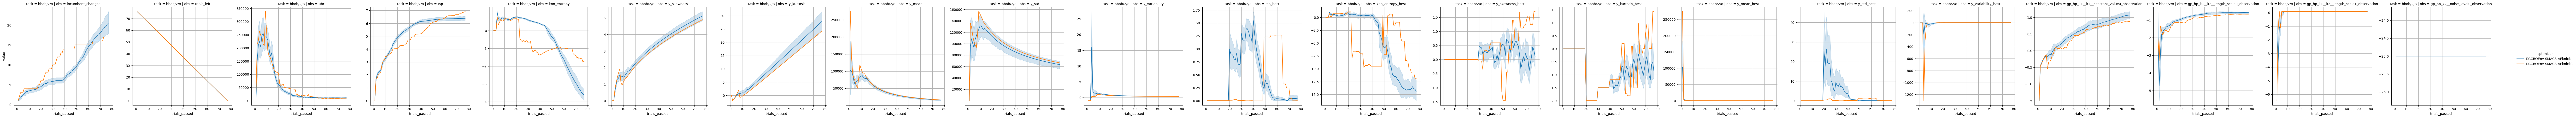

In [ ]:
# Influence on features of EI -> PI jump at 50 % budget

g = sns.relplot(
    data=plot_df,
    x="trials_passed",
    y="value",
    hue="optimizer",
    col="obs",
    row="task",
    kind="line",
    facet_kws={"sharey": False},
)
for ax in g.axes.flat:
    ax.grid(True)

In [ ]:
for i in range(2, 25):

    g = sns.relplot(
        data=plot_df[plot_df["task"] == f"bbob/2/{i}"],
        x="trials_passed",
        y="value",
        hue="optimizer",
        col="obs",
        row="task",
        kind="line",
        facet_kws={"sharey": False},
    )
    for ax in g.axes.flat:
        ax.grid(True)
    plt.savefig(f"../figures_best_obs/obs/plot_{i}.png", dpi=300)

In [20]:
plot_df_rew = rewards.melt(
    id_vars=["task", "seed", "n_trials", "optimizer"],
    value_vars=["trajectory_auc"],
    var_name="rew",
)

In [ ]:
for i in range(1, 2):

    g = sns.relplot(
        data=plot_df_rew[plot_df_rew["task"] == f"bbob/2/{i}"],
        x="n_trials",
        y="value",
        hue="optimizer",
        col="rew",
        row="task",
        kind="line",
        facet_kws={"sharey": False},
    )
    for ax in g.axes.flat:
        ax.grid(True)
    plt.savefig(f"../figures_best_obs/rew/plot_{i}.png", dpi=300)

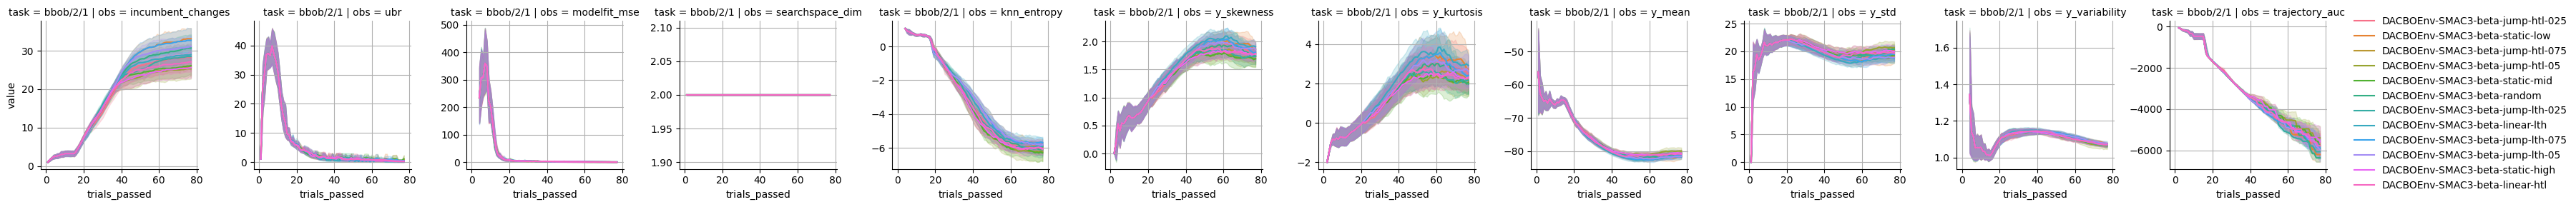

In [93]:
g = sns.FacetGrid(plot_df[plot_df["task"] == "bbob/2/1"], col="obs", row="task", sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="trials_passed",
    y="value",
    hue="optimizer",
)
g.add_legend()
for ax in g.axes.flat:
    ax.grid(True)
plt.savefig("../figures/plot1.png", dpi=300)